# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates how to use sklearn.

## 0. End-to-End Scikit-Learn Workflow

In [2977]:
# 1. Get the data
import pandas as pd
import numpy as np
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2978]:
# Create X (Features Matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [2979]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [2980]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2981]:
clf.fit(X_train, y_train);

In [2982]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [2983]:
y_test

78     1
33     1
140    1
130    1
72     1
      ..
203    0
274    0
247    0
42     1
245    0
Name: target, Length: 61, dtype: int64

In [2984]:
# 4. Evaluate the model on training data and test data
clf.score(X_train, y_train)

1.0

In [2985]:
clf.score(X_test, y_test)

0.819672131147541

In [2986]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.79      0.87      0.83        31

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [2987]:
confusion_matrix(y_test, y_preds)

array([[23,  7],
       [ 4, 27]])

In [2988]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [2989]:
# 5. Improve a model
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators.")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators.
Model accuracy on test set: 77.05%

Trying model with 20 estimators.
Model accuracy on test set: 80.33%

Trying model with 30 estimators.
Model accuracy on test set: 77.05%

Trying model with 40 estimators.
Model accuracy on test set: 81.97%

Trying model with 50 estimators.
Model accuracy on test set: 80.33%

Trying model with 60 estimators.
Model accuracy on test set: 83.61%

Trying model with 70 estimators.
Model accuracy on test set: 80.33%

Trying model with 80 estimators.
Model accuracy on test set: 80.33%

Trying model with 90 estimators.
Model accuracy on test set: 77.05%



In [2990]:
# 6. Save the model and load it
import pickle

pickle.dump(clf, open("../data/random_forest_model_1.pkl", "wb"))

In [2991]:
loaded_model = pickle.load(open("../data/random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7704918032786885

## 1. Getting our data ready to be used with machine learning

**Three main tasks**:
1. Split data into features and labels (usually `X` and `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values (also called feature encoding)

In [2992]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2993]:
# X will be all the data without the target column (what we want to predict)
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [2994]:
# y is the target
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [2995]:
# Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2996]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [2997]:
X.shape

(303, 13)

In [2998]:
len(heart_disease)

303

In [2999]:
X_test.shape

(61, 13)

In [3000]:
X.shape[0] * 0.8

242.4

In [3001]:
X_train.shape

(242, 13)

### Workflow
1. clean data
2. transform data
3. reduce data

### 1.1. Make sure all data is numerical

In [3002]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [3003]:
len(car_sales)

1000

In [3004]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [3005]:
# check for missing data
null_columns = car_sales.columns[car_sales.isnull().any()]
car_sales[null_columns].isnull().sum()

Series([], dtype: float64)

In [3006]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3007]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#model.fit(X_train, y_train)
#model.score(X_test, y_test)

In [3008]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [3009]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [3010]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [3011]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [3012]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [3013]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [3014]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2. Deal with missing values

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [3015]:
# import car sales data with missing values
car_sales_md = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_md.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [3016]:
car_sales_md.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [3017]:
# Create X & y
X = car_sales_md.drop("Price",axis=1)
y = car_sales_md["Price"]

In [3018]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

#transformed_X = transformer.fit_transform(X)
#transformed_X

In [3019]:
car_sales_md

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill missing data with Pandas

In [3020]:
# Fill the "Make" column
car_sales_md["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_md["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)"
car_sales_md["Odometer (KM)"].fillna(car_sales_md["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_md["Doors"].fillna(4, inplace=True)

In [3021]:
# check dataframe again
car_sales_md.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [3022]:
# remove rows with missing Price value
car_sales_md.dropna(inplace=True)

In [3023]:
car_sales_md.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [3024]:
len(car_sales_md)

950

In [3025]:
X = car_sales_md.drop("Price", axis=1)
y = car_sales_md["Price"]

In [3026]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_md)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing values with scikit-learn

In [3027]:
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [3028]:
# Drop the rows with no labels (Price column)
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [3029]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [3030]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Createa an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [3031]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer(KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer(KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [3032]:
car_sales_filled.isna().sum()

Make            0
Colour          0
Doors           0
Odometer(KM)    0
dtype: int64

In [3033]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [3034]:
# Data is now numerical and has no missing values
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [3035]:
len(car_sales_filled), len (car_sales)

(950, 1000)

process of filling missing values = imputation
process of turning non-numerical values into numerical values = feature engineering or feature encoding

## 2. Choosing the right estimator/algorithm for the problem

(Scikit-Learn uses "estimator" as another term for machine learning model or algorithm.)

- **Classification** - predicting whether a sample is one thing or another
- **Regression** - predicting a number

Check the map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [3036]:
### 2.1. Pick a machine learning model for a regression problem
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3037]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3038]:
# How many samples do we have?
len(boston_df)

506

In [3039]:
# Missing data?
boston_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [3040]:
# Let's try Ridge Regression model
from sklearn.linear_model import Ridge

# random seed
np.random.seed(42)

# Create data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate Rigde model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168522

How do we improve the score?

What if Ridge wasn't working?

Check the map:https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression 

In [3041]:
# Let's try Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.873969014117403

In [3042]:
# Check Rigde model again
model.score(X_test, y_test)

0.6662221670168522

### 2.2. Choosing an estimator for a classification problem

In [3043]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3044]:
len(heart_disease)

303

In [3045]:
# try Naive Bayes
from sklearn.naive_bayes import GaussianNB

np.random.seed(42)

# Create features matrix and target vector
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)

# Evaluate model
gauss_model.score(X_test, y_test)

0.8688524590163934

In [3046]:
# try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate model
rf_model.score(X_test, y_test)

0.8524590163934426

#### Tip

1. If you have structured data, use ensembe methods
2. If you have unstructured data, use deep learning or transfer learning

### Aside: Dimensionality Reduction

see https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html
& https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [3047]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(2) # project from 16 to 2 dimensions
projected = pca.fit_transform(heart_disease)

# shape of original data, shape of reduced data
heart_disease.shape, projected.shape

((303, 14), (303, 2))

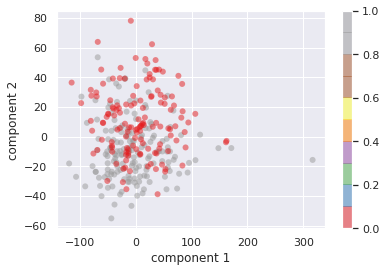

In [3048]:
# scatter plot

plt.scatter(projected[:, 0], projected[:, 1],
            c=heart_disease.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Set1', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

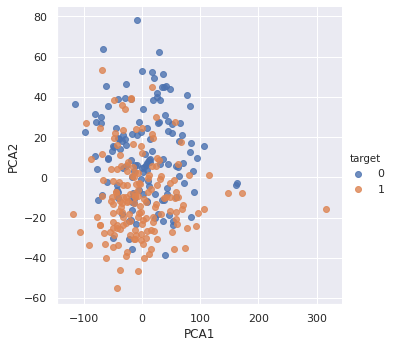

In [3049]:
# Alternative implementation

# instantiate model with 2 dimensions
model = PCA(n_components=2)
# fit to data
model.fit(X)
# transform data to two dimensions
X_2D = model.transform(X)

# plot results with seaborn
heart_disease['PCA1'] = X_2D[:, 0]
heart_disease['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue="target", data=heart_disease, fit_reg=False);

In [3050]:
# remove the PCA columns from the DataFrame
heart_disease.drop('PCA1', axis=1, inplace=True)
heart_disease.drop('PCA2', axis=1, inplace=True)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3051]:
# dimensionality reduction with Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(heart_disease)
heart_disease_projected = iso.transform(heart_disease)

# shape of original data (14 4 4 4 dimensions), shape of projected data (2 dimensions)
heart_disease.shape, heart_disease_projected.shape

((303, 14), (303, 2))

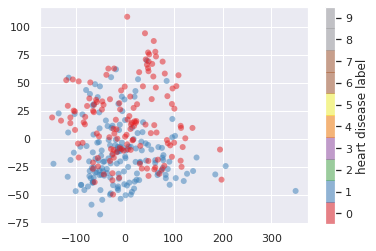

In [3052]:
# Plot data
plt.scatter(heart_disease_projected[:, 0], heart_disease_projected[:, 1], c=heart_disease.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Set1', 10))
plt.colorbar(label='heart disease label', ticks=range(10))
plt.clim(-0.5, 9.5);

## 3. Fit the model on our data to make prediction

### 3.1. Fitting the model to the data

- `X` = features, feature variables, data
- `y` = labels, targets, target variables

In [3053]:
# import model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create features matrix and target vector
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate model
model.score(X_test, y_test)

0.8524590163934426

In [3054]:
# features
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [3055]:
# target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2. Make predictions using a machine learning model

2 ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [3056]:
# Use a trained model to predictions
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [3057]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [3058]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [3059]:
model.score(X_test, y_test)

0.8524590163934426

In [3060]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [3061]:
# Make predictions with predict_proba()
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [3062]:
# Let's predict() on the same data...
model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()1 can also be used for regression models.

In [3063]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3064]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split data
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2)

# instantiate the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)
y_preds[:10]

array([10.602, 21.753, 24.429, 14.095, 20.358, 25.265, 23.793, 25.109,
       10.952, 15.502])

In [3065]:
np.array(y_test[:10])

array([12. , 19.9, 19.4, 13.4, 18.2, 24.6, 21.1, 24.7,  8.7, 27.5])

In [3066]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.8664950495049513

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score`
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1. Use `score` method

In [3068]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3069]:
diabetes = pd.DataFrame(boston["data"], columns=boston["feature_names"])
diabetes["target"] = pd.Series(boston["target"])
diabetes.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


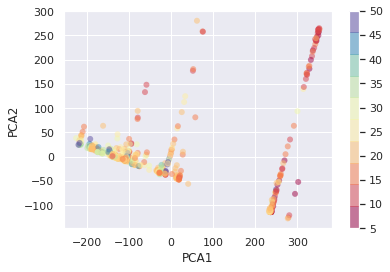

In [3070]:
# Reduce dimensionality with PCA
from sklearn.decomposition import PCA

# instantiate model with 2 dimensions
pca = PCA(2)

# project from 13 to 2 dimensions
project_diab = pca.fit_transform(diabetes)

# plot
plt.scatter(project_diab[:,0], project_diab[:,1],
            c=diabetes.target, edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('Spectral', 10))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar();

In [3071]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor

# Create data
X_diab = diabetes.drop('target', axis=1)
y_diab = diabetes['target']
X_diab.shape, y_diab.shape

((506, 13), (506,))

In [3072]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [3073]:
# Predict data
y_preds = clf.predict(X_test)
y_preds[:10]

array([24.184, 18.767, 20.35 ,  9.954, 41.806, 21.903, 19.248, 24.689,
       23.043, 31.566])

In [3074]:
np.array(y_test[:10])

array([23.1, 20.1, 22.8,  8.4, 50. , 21.2, 18.3, 25.3, 22.8, 28.2])

In [3075]:
clf.score(X_test, y_test)

0.8669109648179978

**Note**: The `score` method uses different evaluation metrics depending on the model (regression, classification)

### 4.2. Evaluating a model using the `scoring` parameter

In [3076]:
# import model
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create features matrix and target vector
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate model
model.score(X_test, y_test)

0.8524590163934426

In [3077]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [3078]:
X.shape, y.shape

((303, 13), (303,))

In [3101]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8524590163934426

In [3081]:
cross_val_score(model, X_test, y_test, cv=6)

array([0.81818182, 0.8       , 0.7       , 0.6       , 0.9       ,
       0.9       ])

In [3103]:
# Default scoring parameter of classifier = mean accuracy R^2
#clf.score()

In [3082]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_pred, y_test))
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print("Confusion Matrix:")
cm

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix:


array([[24,  5],
       [ 4, 28]])

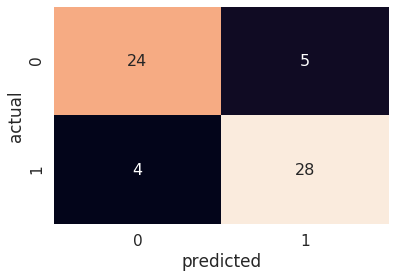

In [3153]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 16}, cbar=False)
plt.xlabel('predicted')
plt.ylabel('actual');

In [3084]:
# Make cross validated predictions
from sklearn.model_selection import cross_val_predict
y_cross_pred = cross_val_predict(model, X, y)
y_cross_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [3085]:
# Accuracy score
accuracy_score(y, y_cross_pred)

0.8250825082508251

In [3098]:
# Confusion Matrix
cm_cross = confusion_matrix(y, y_cross_pred)
cm_cross

array([[108,  30],
       [ 23, 142]])

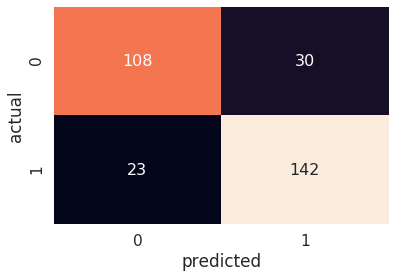

In [3152]:
sns.heatmap(cm_cross, fmt='d', annot=True, annot_kws={"size": 16}, cbar=False)
plt.xlabel('predicted');
plt.ylabel('actual');

### 4.2. Classifictaion model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### 4.2.1 Accuracy

In [3123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = cross_val_score(rfc, X, y, cv=6)
score

array([0.82352941, 0.82352941, 0.88235294, 0.8       , 0.8       ,
       0.72      ])

In [3124]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(score) *100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 80.82%


#### 4.2.2. Area under ROC curve
* Area under curve (AUC)
* Receiver operating characteritic (ROC) curve

ROC curves are a comparison of a model's true positive rate (tpr) vs. models false positive rate (fpr).

In [3125]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = rfc.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [3126]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [3128]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
        0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
        0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
        0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ]),
 array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
        0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
        0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
        0.96875, 1.     , 1.     , 1.     ]),
 array([2.  , 1.  , 0.99, 0.83, 0.82, 0.8 , 0.78, 0.74, 0.67, 0.66, 0.64,
        0.62, 0.61, 0.53, 0.51, 0.3 , 0.2 , 0.16, 0.14, 0.13, 0.11, 0.07,
        0.06, 0.05, 0.  ]))

In [3129]:
# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [3130]:
# Create a function for plotting ROC curves

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) ofA model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show();

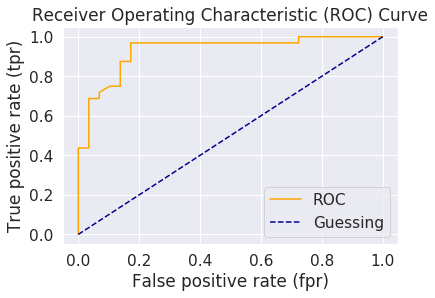

In [3131]:
plot_roc_curve(fpr, tpr)

In [3132]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

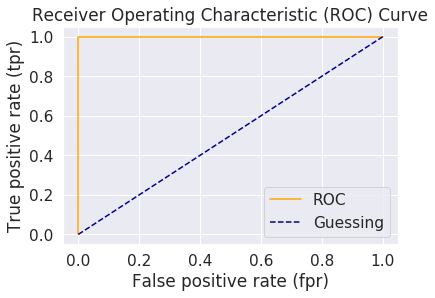

In [3133]:
# Plot perfet ROC curve and AUC core
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [3134]:
# Perefct AUC scroe
roc_auc_score(y_test, y_test)

1.0

#### 4.2.3 Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In [3136]:
from sklearn.metrics import confusion_matrix

y_preds = rfc.predict(X_test)

mat = confusion_matrix(y_test, y_preds)
mat

array([[24,  5],
       [ 4, 28]])

In [3138]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual"],
            colnames=["Predicted"])

Predicted,0,1
Actual,,
0,24,5
1,4,28


In [3150]:
# Visualize seaborn heatmap

def plot_conf_mat(confusion_matrix):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix, fmt='d', annot=True, cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label');

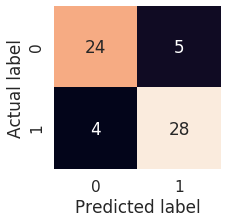

In [3151]:
plot_conf_mat(mat);

#### 4.2.4. Classification Report

In [3154]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [3159]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics
Model evaluation metrics documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#

1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)